In [1]:
import pandas as pd
import pyreadstat
import scipy.stats as sp
#pyreadstat is not an optional dependency despite the importerror messages saying so. I tried installing it with conda but it
#said that the package was unavailable. I installed it using pip and had success. I'm not sure if using the two different 
#package managers will cause problems.

In [2]:
CCGA2012df = pd.read_spss('SPSSdataFiles\\2012public.sav')
CCGA2014df = pd.read_spss('SPSSdataFiles\\2014public.sav')
CCGA2016df = pd.read_spss('SPSSdataFiles\\2016ChicagoCouncilSurvey-DataSet.sav')
CCGA2017df = pd.read_spss('SPSSdataFiles\\2017public.sav')
CCGA2019df = pd.read_spss('SPSSdataFiles\\2019 Chicago Council Survey - Datafile.sav')
CCGA2020df = pd.read_spss('SPSSdataFiles\\20-039675-01_Chicago Council_2020 Annual Survey_Main_Client.sav')

**_After all of the files are read in, I might consider merging all of the dataframes into a single dataframe containing just the response to Q21, statistical weight, demographic information like race, gender, age, political identity, and one new column corresponding to the year that the data was collected._**  

In [3]:
CCGA2014df.head()
list(CCGA2014df)

['Respondent_Serial',
 'ppincimp',
 'ppeduc',
 'ppeducat',
 'ppage',
 'ppgender',
 'ppethm',
 'PPHHHEAD',
 'PPHHSIZE',
 'PPHOUSE',
 'PPMARIT',
 'PPMSACAT',
 'PPREG4',
 'PPRENT',
 'PPSTATEN',
 'PPT01',
 'PPT1317',
 'PPT18OV',
 'PPT25',
 'PPT612',
 'PPWORK',
 'PPNET',
 'Xspanish',
 'Xprimelan',
 'xhispan',
 'xchicago',
 'q3',
 'q3b_1',
 'q3b_2',
 'q3b_3',
 'q3b_4',
 'q3b_5',
 'q3b_6',
 'q3b_7',
 'q3b_8',
 'q3b_9',
 'q3b_10',
 'q3b_11',
 'q3b_12',
 'q3b_13',
 'q3b_14',
 'q3b_15',
 'q3b_16',
 'q3b_17',
 'q3b_18',
 'q3b_19',
 'q3b_20',
 'q3b_21',
 'q3b_22',
 'q3b_23',
 'q3b_24',
 'q3b_25',
 'q3b_26',
 'q3b_27',
 'q3b_28',
 'q3b_29',
 'q3b_30',
 'q3b_31',
 'q3b_32',
 'q3b_33',
 'q3b_34',
 'q3b_35',
 'q3b_36',
 'q3b_37',
 'q3b_38',
 'q3b_39',
 'q3b_40',
 'Q3B',
 'Q3B_Codes',
 'q5_01',
 'q5_02',
 'q5_03',
 'q5_04',
 'q5_05',
 'q5_06',
 'q5_07',
 'q5_08',
 'q5_09',
 'q5_10',
 'q5_11',
 'q5_12',
 'q5_13',
 'q5_14',
 'q5_15',
 'q5_16',
 'q5_17',
 'q5_18',
 'q5_19',
 'q5_20',
 'q7_01',
 'q7_02',
 

In [4]:
iterable_list_of_dfs = [CCGA2012df, CCGA2014df, CCGA2016df, CCGA2017df, CCGA2019df, CCGA2020df]
test_column_names = ['CaseID', 'ppagect4', 'Q1010', 'partyid3nl', 'PPGENDER', 'PPETHM']
empty_ls = []

for col_name in test_column_names:
    for df in iterable_list_of_dfs:
        empty_ls.append(tuple((col_name, col_name in list(df))))
       
empty_ls

[('CaseID', True),
 ('CaseID', False),
 ('CaseID', True),
 ('CaseID', True),
 ('CaseID', True),
 ('CaseID', True),
 ('ppagect4', True),
 ('ppagect4', False),
 ('ppagect4', True),
 ('ppagect4', True),
 ('ppagect4', True),
 ('ppagect4', True),
 ('Q1010', True),
 ('Q1010', False),
 ('Q1010', True),
 ('Q1010', True),
 ('Q1010', True),
 ('Q1010', True),
 ('partyid3nl', False),
 ('partyid3nl', False),
 ('partyid3nl', False),
 ('partyid3nl', True),
 ('partyid3nl', False),
 ('partyid3nl', False),
 ('PPGENDER', True),
 ('PPGENDER', False),
 ('PPGENDER', True),
 ('PPGENDER', True),
 ('PPGENDER', True),
 ('PPGENDER', True),
 ('PPETHM', True),
 ('PPETHM', False),
 ('PPETHM', True),
 ('PPETHM', True),
 ('PPETHM', True),
 ('PPETHM', True)]

In [5]:
CCGA2016df.Q1010.unique()

[Democrat, Independent, Republican, Other, Refused]
Categories (5, object): [Democrat, Independent, Republican, Other, Refused]

In [6]:
clean_2012df = CCGA2012df[['CaseID', 'Q21', ]]

In [7]:
clean_2014df = CCGA2014df[["Respondent_Serial", "q21", "q1010", "weight1", "ppgender", "ppethm", "ppage"]]
clean_2014df.rename(columns = {
    'Respondent_Serial':'CaseID', 'q21':'Q21', 'q1010':'Q1010', 'weight1':'Weight', 'ppgender':'PPGENDER', 'ppethm':'PPETHM', 'ppage':'ppagect4'
}, inplace=True)
clean_2014df['Year'] = 2014
clean_2014df.head()

C:\Users\wesle\Anaconda3\lib\site-packages\pandas\core\frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
<ipython-input-7-044a71513dbb>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_2014df['Year'] = 2014


,CaseID,Q21,Q1010,Weight,PPGENDER,PPETHM,ppagect4,Year
0,5.0,The greatest country in the world,Independent,0.4925,Male,Hispanic,44,2014
1,6.0,No greater than other nations,Independent,1.6331,Male,Hispanic,25,2014
2,7.0,The greatest country in the world,Republican,1.0425,Female,"White, Non-Hispanic",38,2014
3,8.0,The greatest country in the world,Independent,0.8771,Male,"White, Non-Hispanic",66,2014
4,9.0,The greatest country in the world,Democrat,1.5227,Male,"White, Non-Hispanic",37,2014


In [8]:
exceptionalism_2012_mask=CCGA2012df['Q21'] == "The greatest country in the world"
exceptionalism_2014_mask=CCGA2014df['q21'] == "The greatest country in the world"
exceptionalism_2016_mask=CCGA2016df['Q21'] == "The greatest country in the world"
exceptionalism_2017_mask=CCGA2017df['Q21'] == "The greatest country in the world"
exceptionalism_2019_mask=CCGA2019df['Q21'] == "The greatest country in the world"
exceptionalism_2020_mask=CCGA2020df['Q21'] == "The greatest country in the world"

In [9]:
sample_means_ls = [
    ((len(CCGA2012df[exceptionalism_2012_mask])/len(CCGA2012df))*100),
    ((len(CCGA2014df[exceptionalism_2014_mask])/len(CCGA2014df))*100),
    ((len(CCGA2016df[exceptionalism_2016_mask])/len(CCGA2016df))*100),
    ((len(CCGA2017df[exceptionalism_2017_mask])/len(CCGA2017df))*100),
    ((len(CCGA2019df[exceptionalism_2019_mask])/len(CCGA2019df))*100),
    ((len(CCGA2020df[exceptionalism_2020_mask])/len(CCGA2020df))*100)
]

print(sample_means_ls)

[70.378263185935, 66.46110056925995, 62.73653566229985, 63.44202898550725, 58.76639145216125, 57.555660824253906]


In [10]:
# To get the weighted mean I use a booleanmask to select the values that responded with "The greatest country in the world"
# and put the sum of the weights of those responses over the total of the weights. Effectively treating the response of
# "The greatest country in the world" as equal to 1.

# weighted_mean_formula = (df[weight]*df[response as a number]).sum()/df[weight].sum()

# The way that the weights are calculated can differ from year to year. 2017 had like 8 different weight variables.

weighted_means_ls= [
    CCGA2012df[exceptionalism_2012_mask]['weight1'].sum()/CCGA2012df['weight1'].sum(),
    CCGA2014df[exceptionalism_2014_mask]['weight1'].sum()/CCGA2014df['weight1'].sum(),
    CCGA2016df[exceptionalism_2016_mask]['Weight'].sum()/CCGA2016df['Weight'].sum(),
    CCGA2017df[exceptionalism_2017_mask]['Weight1'].sum()/CCGA2017df['Weight1'].sum(),
    CCGA2019df[exceptionalism_2019_mask]['weight'].sum()/CCGA2019df['weight'].sum(),
    CCGA2020df[exceptionalism_2020_mask]['weight'].sum()/CCGA2020df['weight'].sum()
]

weighted_means_ls

[0.7006456420162835,
 0.6469217071957698,
 0.610721606726692,
 0.6291128640809741,
 0.5670888505542082,
 0.5427296651286607]

In [11]:
republican_yes_Q21_ls = [
    len(CCGA2012df[(CCGA2012df['Q21'] == 'The greatest country in the world') & (CCGA2012df['Q1010'] == 'Republican')])/len(CCGA2012df),
    len(CCGA2014df[(CCGA2014df['q21'] == 'The greatest country in the world') & (CCGA2014df['q1010'] == 'Republican')])/len(CCGA2014df),
    len(CCGA2016df[(CCGA2016df['Q21'] == 'The greatest country in the world') & (CCGA2016df['Q1010'] == 'Republican')])/len(CCGA2016df),
    len(CCGA2017df[(CCGA2017df['Q21'] == 'The greatest country in the world') & (CCGA2017df['Q1010'] == 'Republican')])/len(CCGA2017df),
    len(CCGA2019df[(CCGA2019df['Q21'] == 'The greatest country in the world') & (CCGA2019df['Q1010'] == 'Republican')])/len(CCGA2019df),
    len(CCGA2020df[(CCGA2020df['Q21'] == 'The greatest country in the world') & (CCGA2020df['Q1010'] == 'Republican')])/len(CCGA2020df),
]

democrat_yes_Q21_ls = [
    len(CCGA2012df[(CCGA2012df['Q21'] == 'The greatest country in the world') & (CCGA2012df['Q1010'] == 'Democrat')])/len(CCGA2012df),
    len(CCGA2014df[(CCGA2014df['q21'] == 'The greatest country in the world') & (CCGA2014df['q1010'] == 'Democrat')])/len(CCGA2014df),
    len(CCGA2016df[(CCGA2016df['Q21'] == 'The greatest country in the world') & (CCGA2016df['Q1010'] == 'Democrat')])/len(CCGA2016df),
    len(CCGA2017df[(CCGA2017df['Q21'] == 'The greatest country in the world') & (CCGA2017df['Q1010'] == 'Democrat')])/len(CCGA2017df),
    len(CCGA2019df[(CCGA2019df['Q21'] == 'The greatest country in the world') & (CCGA2019df['Q1010'] == 'Democrat')])/len(CCGA2019df),
    len(CCGA2020df[(CCGA2020df['Q21'] == 'The greatest country in the world') & (CCGA2020df['Q1010'] == 'Democrat')])/len(CCGA2020df),
]

independent_yes_Q21_ls = [
    len(CCGA2012df[(CCGA2012df['Q21'] == 'The greatest country in the world') & (CCGA2012df['Q1010'] == 'Independent')])/len(CCGA2012df),
    len(CCGA2014df[(CCGA2014df['q21'] == 'The greatest country in the world') & (CCGA2014df['q1010'] == 'Independent')])/len(CCGA2014df),
    len(CCGA2016df[(CCGA2016df['Q21'] == 'The greatest country in the world') & (CCGA2016df['Q1010'] == 'Independent')])/len(CCGA2016df),
    len(CCGA2017df[(CCGA2017df['Q21'] == 'The greatest country in the world') & (CCGA2017df['Q1010'] == 'Independent')])/len(CCGA2017df),
    len(CCGA2019df[(CCGA2019df['Q21'] == 'The greatest country in the world') & (CCGA2019df['Q1010'] == 'Independent')])/len(CCGA2019df),
    len(CCGA2020df[(CCGA2020df['Q21'] == 'The greatest country in the world') & (CCGA2020df['Q1010'] == 'Independent')])/len(CCGA2020df),
]

print(republican_yes_Q21_ls)
print(democrat_yes_Q21_ls)
print(independent_yes_Q21_ls)

[0.2509323388385722, 0.21726755218216318, 0.2430858806404658, 0.23478260869565218, 0.23506556580864496, 0.2567503552818569]
[0.23175279701651572, 0.22343453510436434, 0.18922852983988356, 0.1822463768115942, 0.16415735794074793, 0.1250592136428233]
[0.17581246670218434, 0.18311195445920303, 0.15623483745754488, 0.16847826086956522, 0.14715881495871783, 0.1605873993368072]


As for plotting, I should do a bar chart for support for American Exceptionalism for each year by political party. Y axis is percent of respondents who say that the US is "the greatest country in the world." The two bars in the group are Republican and Democrat. So the visualization will demonstrate total support for each year and accurately represent the percentages in the above cells but will seperate those percentages into different bars by political party, (or other demographic variables.)
Age bins will correspond to the Pew Research Center reccommended generational age ranges which can be found here... https://www.beresfordresearch.com/age-range-by-generation/ 

In [12]:
%matplotlib notebook

In [13]:
import matplotlib as mpl
mpl.get_backend()

'nbAgg'

In [14]:
import matplotlib.pyplot as plt
import numpy as np

<IPython.core.display.Javascript object>


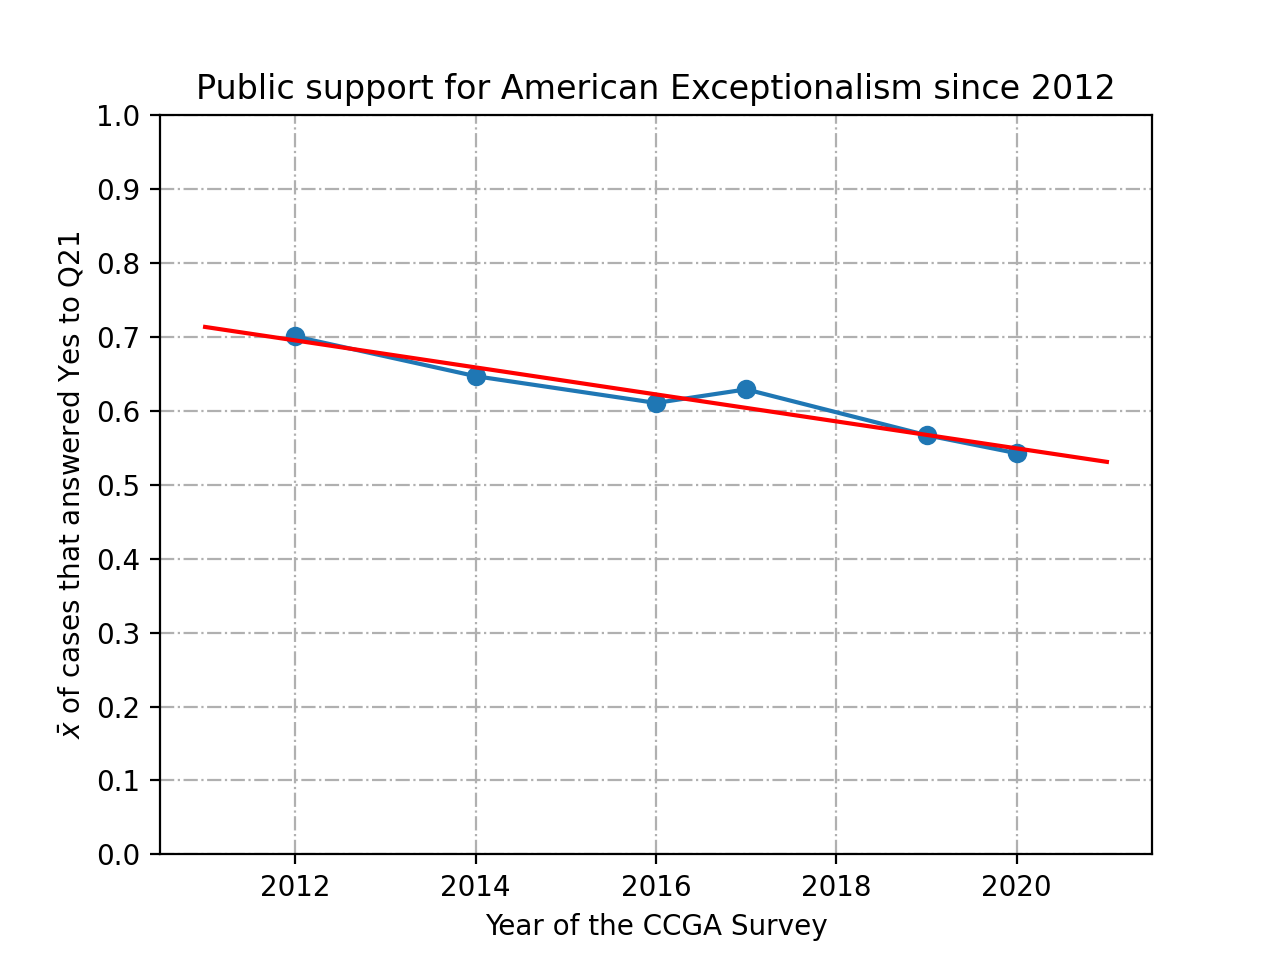

r =  -0.9692033716593726 
 p =  0.0014080442169373314 
 s =  0.002319105528860694


In [43]:
# I should probably have just made a single list of tuples for this to be more efficient and elegant
# but fuckit. I get the same output here.

years_ls = [2012, 2014, 2016, 2017, 2019, 2020]
plt.figure()
plt.plot(years_ls, weighted_means_ls, '-o')
plt.ylim([0,1])
plt.yticks(np.arange(0, 1.1, 0.1))
plt.xlabel('Year of the CCGA Survey')
plt.ylabel(r'$\bar{x}$ of cases that answered ''Yes'' to Q21')
plt.title('Public support for American Exceptionalism since 2012')
plt.grid(linestyle='-.')
y = weighted_means_ls
x = years_ls
slope, intercept, r_value, p_value, std_err =sp.linregress(x,y)
print('r = ', r_value, '\n', 'p = ', p_value, '\n', 's = ', std_err)

x_0=2011
y_0=(x_0*slope)+intercept
x_1=2021
y_1=(x_1*slope)+intercept

plt.plot([x_0, x_1], [y_0, y_1], c='r')

<IPython.core.display.Javascript object>


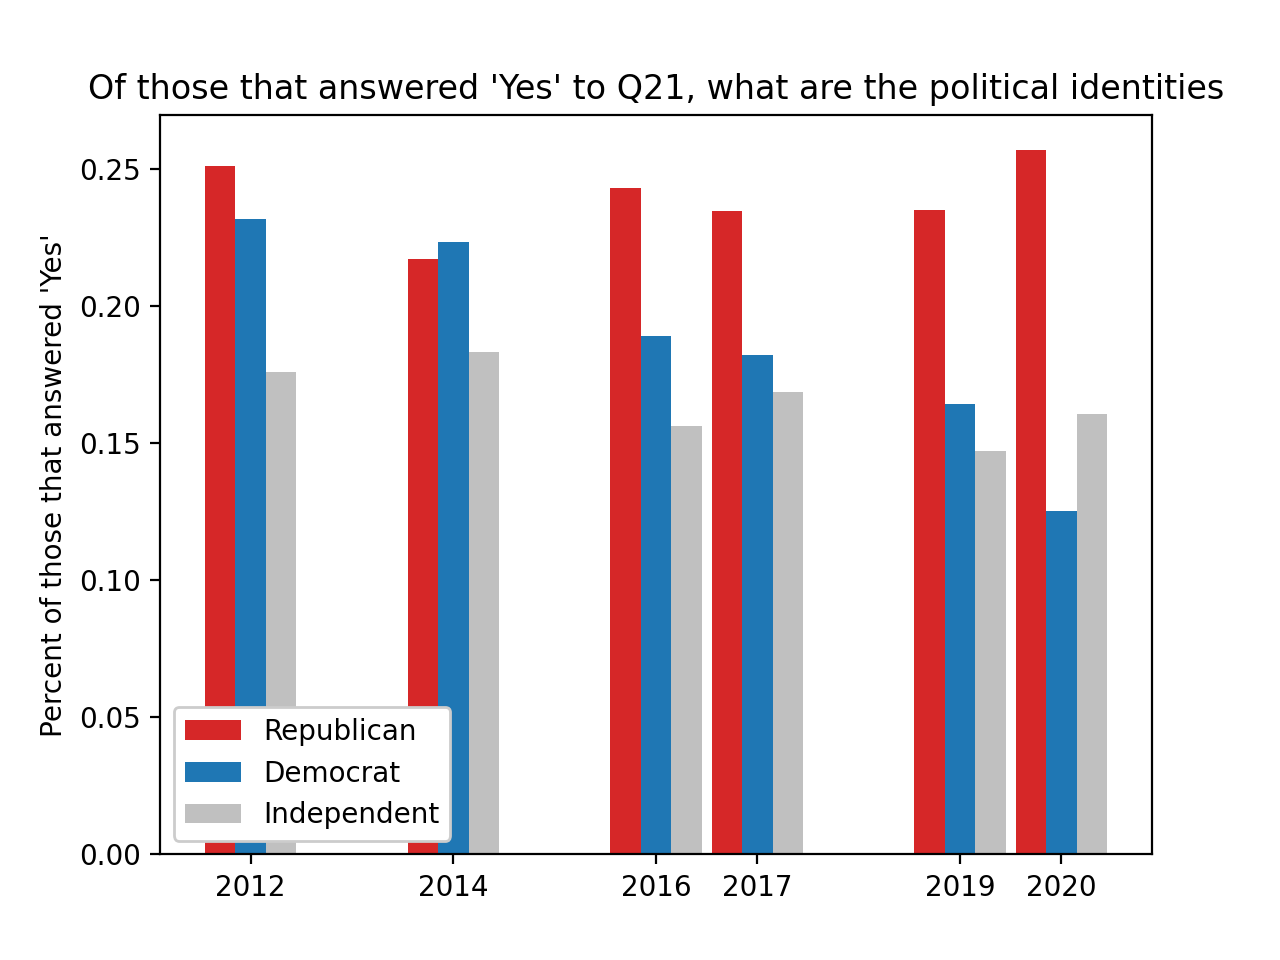

In [26]:
width =0.3
plt.figure()
plt.bar([2011.7, 2013.7, 2015.7, 2016.7, 2018.7, 2019.7], republican_yes_Q21_ls, color='tab:red', width=width)
plt.bar(years_ls, democrat_yes_Q21_ls, color='tab:blue', width=width)
plt.bar([2012.3, 2014.3, 2016.3, 2017.3, 2019.3, 2020.3], independent_yes_Q21_ls, color='silver', width=width)
plt.xticks(ticks=years_ls)
plt.legend(['Republican', 'Democrat', 'Independent'], loc="lower left", framealpha=1)
plt.ylabel('Percent of those that answered \'Yes\'')
plt.title('Of those that answered \'Yes\' to Q21, what are the political identities')
plt.show()

Not displayed in the above figure are the values for "Refused" and "Other" as responses to Q1010